# Hexagonal puzzle



In [164]:
from main import Hex, draw_pieces, Piece, find_min_max, Board, translate, rotate

from copy import deepcopy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


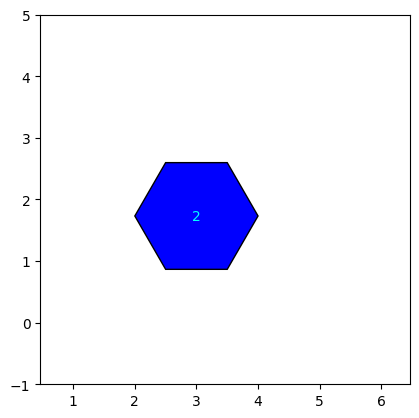

In [165]:
piece = Piece('example', 'blue', 0, [(2,0)])
draw_pieces([piece])


# Pieces


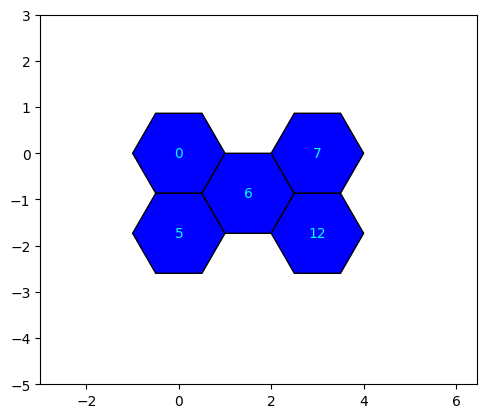

In [166]:
# 5 hex size
bone = Piece('bone', 'blue', 0, [(0,0), (0,1), (1,1), (2,1), (2,2)])
draw_pieces([bone])


In [167]:
import matplotlib.pyplot as plt

# Create a smaller plot with a figure size of (6, 4)
plt.figure(figsize=(6, 4))

# Plot your data here

# Show the plot
plt.show()


<Figure size 600x400 with 0 Axes>

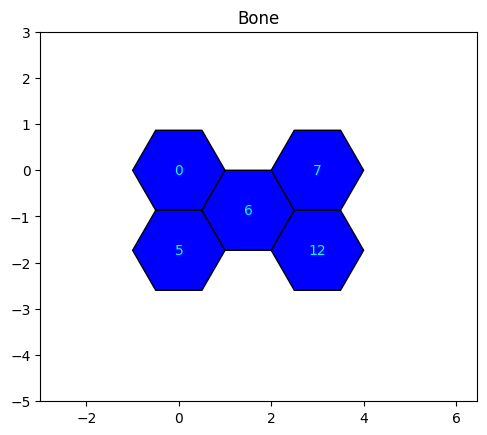

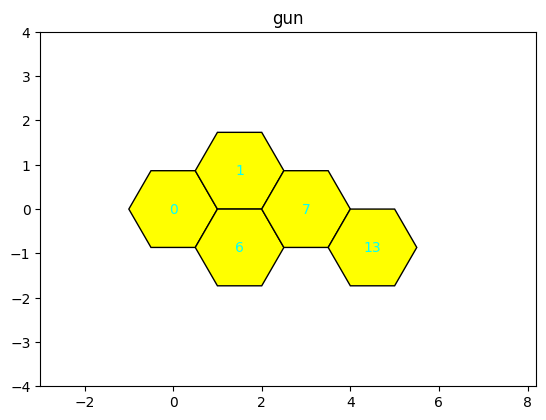

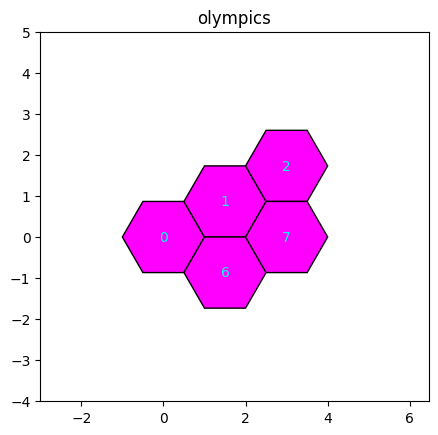

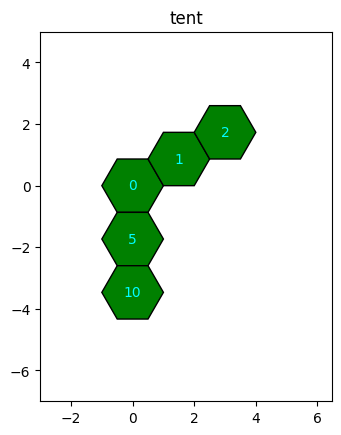

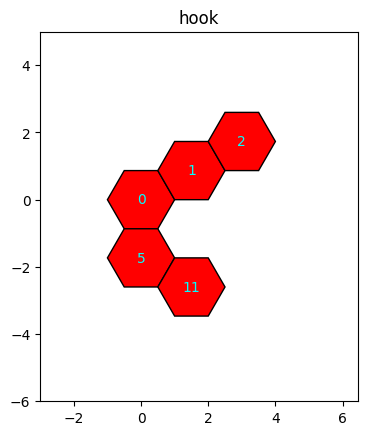

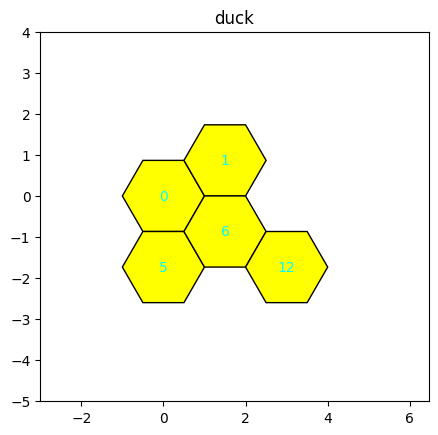

In [183]:
bone = Piece('bone', 'blue', 0, [(0,0), (0,1), (1,1), (2,1), (2,2)])
draw_pieces([bone], title='Bone')

gun = Piece('gun', 'yellow', 1, [(0,0), (1,0), (1,1), (2,1), (3,2)])
draw_pieces([gun], title='gun')

olympics = Piece('olympics', 'magenta', 2, [(0,0), (1,0), (2,0), (1,1), (2,1)])
draw_pieces([olympics], title='olympics')

tent = Piece('tent', 'green', 3, [(0,0), (1,0), (2,0), (0,1), (0,2)])
draw_pieces([tent], title='tent')

hook = Piece('hook', 'red', 4,  [(0,0), (1,0), (2,0), (0,1), (1,2)])
draw_pieces([hook], title='hook')


duck = Piece('duck', 'yellow', 5,  [(0,0), (1,0), (0,1), (1,1), (2,2)])
draw_pieces([duck], title='duck')

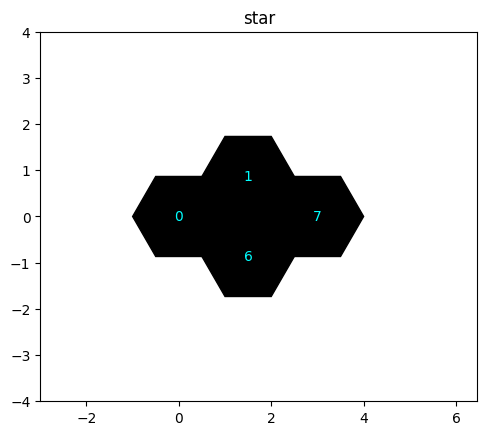

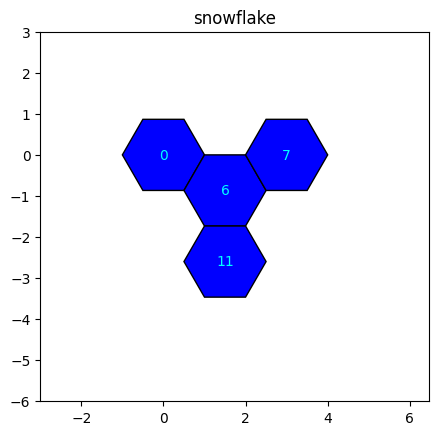

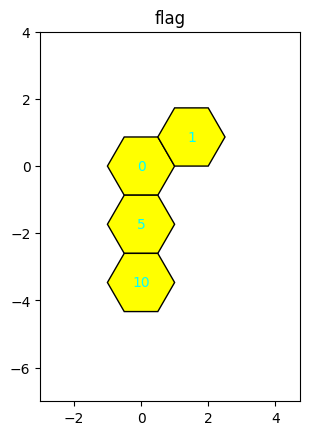

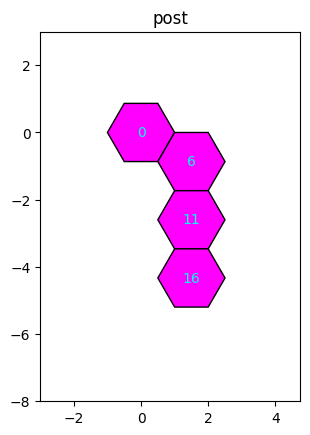

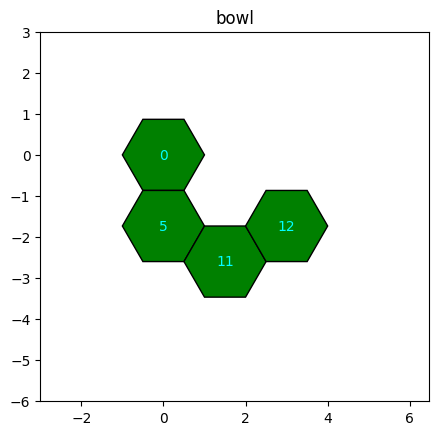

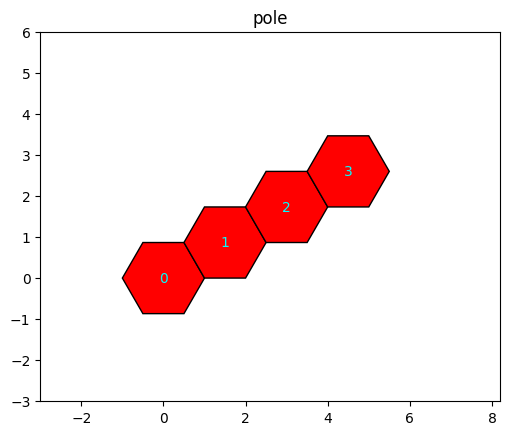

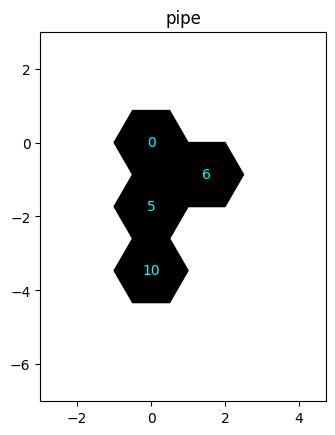

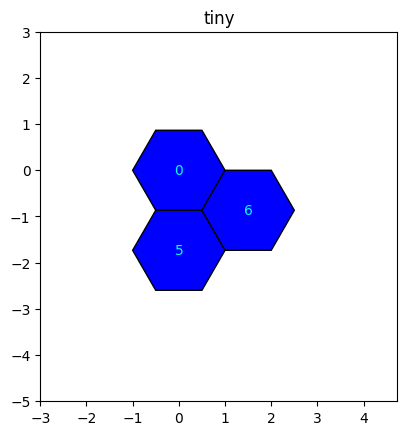

In [180]:

# 4 hex size
star = Piece('star', 'black', 6, [(0,0), (1,0), (1,1), (2,1)])
draw_pieces([star], title='star')

snowflake = Piece('snowflake', 'blue', 7, [(0,0), (1,1), (1,2), (2,1)])
draw_pieces([snowflake], title='snowflake')

flag = Piece('flag', 'yellow', 8, [(0,0), (1,0), (0,1), (0,2)])
draw_pieces([flag], title='flag')

post = Piece('post', 'magenta', 9, [(0,0), (1,1), (1,2), (1,3)])
draw_pieces([post], title='post')

bowl = Piece('bowl', 'green', 10, [(0,0), (0,1), (1,2), (2,2)])
draw_pieces([bowl], title='bowl')

pole = Piece('pole', 'red', 11, [(0,0), (1,0), (2,0), (3,0)])
draw_pieces([pole], title='pole')

pipe = Piece('pipe', 'black', 12, [(0,0), (0,1), (0, 2), (1,1)])
draw_pieces([pipe], title='pipe')

# 3 hex size
tiny = Piece('tiny', 'blue', 13, [(0,0), (0,1), (1,1)])
draw_pieces([tiny], title='tiny')

all_pieces = [bone, gun, olympics, tent, hook, star, snowflake, flag, post, bowl, pole, pipe, tiny]


# Translation and Rotation

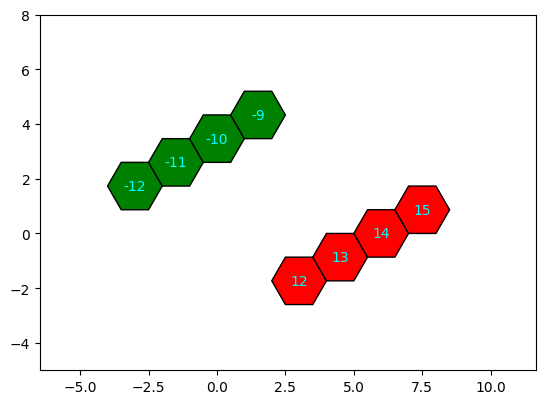

In [170]:
draw_pieces([
    translate(pole, (-2, -2), 'green'), 
    translate(pole, (2, 2))
    ])

And now add rotation (this is tricky to do directly in this skewed system so we'll do this: (x,y) -> (r,theta) -> rotation to delta -> (r,theta + dtheta) -> (x', y')):

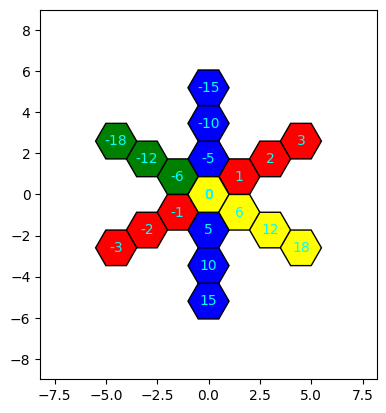

In [171]:
draw_pieces([
    pole, 
    rotate(pole, 60, 'blue'), 
    rotate(pole, 120, 'green'), 
    rotate(pole, 180, 'red'),
    rotate(pole, 240, 'blue'),
    rotate(pole, 300, 'yellow'),
])

# Put piece on the board

In [172]:
translate(pole, (2,0)).hexagons[1].coord

(3, 0)

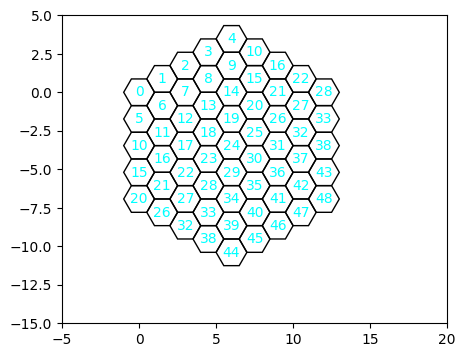

In [173]:
board = Board()
board.draw()

In [174]:
board.add_piece(bone)


True

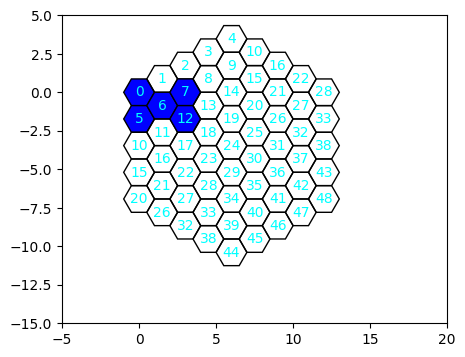

In [175]:
board.draw()

# Backtracking

So now we should implement backtracking. For each piece, and for each rotation, we try to place it on the board. We should also add a heuristics to not go random, in fact, we should always try to put piece next to the already assembled pieces. Let's also try large pieces first, then smaller.

Before we try any of this let's see clarify what solution is: a solution is that no pieces are left, and they all fit within the board.


Let's actually try smaller scope first, since I already know one solution. We'll give it 90% solved board and it will just need to find the last piece:

In [176]:
board = Board()

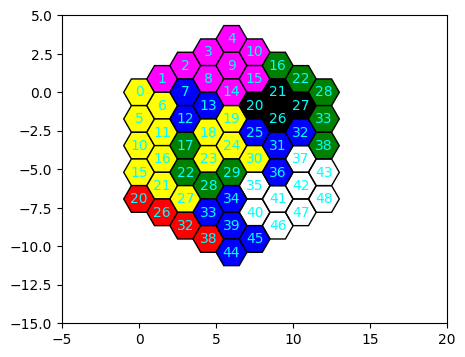

In [207]:
_ = board.add_piece(rotate(gun, 300))
_ = board.add_piece(translate(rotate(post, 60), (1,0)))
_ = board.add_piece(translate(rotate(olympics, 120), (5,2)))
_ = board.add_piece(translate(rotate(tent, 240), (8,4)))
_ = board.add_piece(translate(rotate(star, 0), (5,3)))
_ = board.add_piece(translate(rotate(snowflake, 0), (5,4)))
_ = board.add_piece(translate(rotate(tiny, 0), (2,1)))
_ = board.add_piece(translate(rotate(duck, 0), (3,3)))
_ = board.add_piece(translate(rotate(bowl, 0), (2,3)))
_ = board.add_piece(translate(rotate(flag, 60), (0,3)))
_ = board.add_piece(translate(rotate(pole, 300), (0,4)))
_ = board.add_piece(translate(rotate(bone, 120), (4,8)))


board.draw()

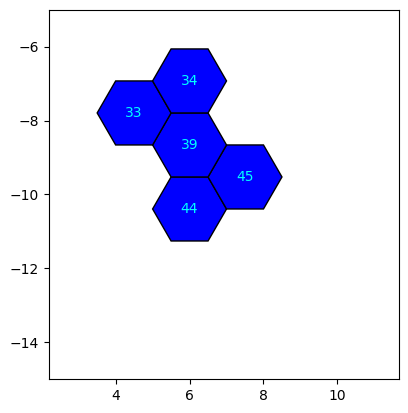

In [206]:
draw_pieces([translate(rotate(bone, 120), (4,8))])

In [ ]:
solutions = []

def backtrack(board, i):
    # Check if the solution is complete
    if i == len(all_pieces):
        solutions.append(deepcopy(board))
        return
    
    # let's find all the possible positions for the i-th piece, and try them all
    # (TODO to add heuristics like adjacency to elements already on the board, etc.)
    piece = all_pieces[i]
    
    next_candidates = generate_candidates(solution, candidates)
    
    # Iterate through the candidates
    for candidate in next_candidates:
        # Make a choice and add it to the solution
        make_choice(solution, candidate)
        
        # Recursively backtrack with the updated solution
        result = backtrack(solution, candidates)
        
        # If a valid solution is found, return it
        if result is not None:
            return result
        
        # Undo the choice and remove it from the solution
        undo_choice(solution, candidate)
    
    # If no valid solution is found, return None
    return None

board = Board()

backtrack(board, i=0)  # we are starting from a first piece





NameError: name 'generate_candidates' is not defined